In [1]:
import numpy as np
import pyuvdata
import matplotlib.pyplot as plt

In [2]:
use_freq_bands = [
    "41",
    "46",
    "50",
    "55",
    "59",
    "64",
    "69",
    "73",
    "78",
    "82",
]
use_file_paths = [f"/lustre/rbyrne/2025-01-17/20250117_140158-140348_{freq}MHz.ms" for freq in use_freq_bands]

Setting telescope_location to value in known_telescopes for OVRO-LWA.
The uvw_array does not match the expected values given the antenna positions. The largest discrepancy is 4023.6715070683913 meters. This is a fairly common situation but might indicate an error in the antenna positions, the uvws or the phasing.
Setting telescope_location to value in known_telescopes for OVRO-LWA.
The uvw_array does not match the expected values given the antenna positions. The largest discrepancy is 4023.671508921727 meters. This is a fairly common situation but might indicate an error in the antenna positions, the uvws or the phasing.
Setting telescope_location to value in known_telescopes for OVRO-LWA.
The uvw_array does not match the expected values given the antenna positions. The largest discrepancy is 4023.671513218849 meters. This is a fairly common situation but might indicate an error in the antenna positions, the uvws or the phasing.
Setting telescope_location to value in known_telescopes f

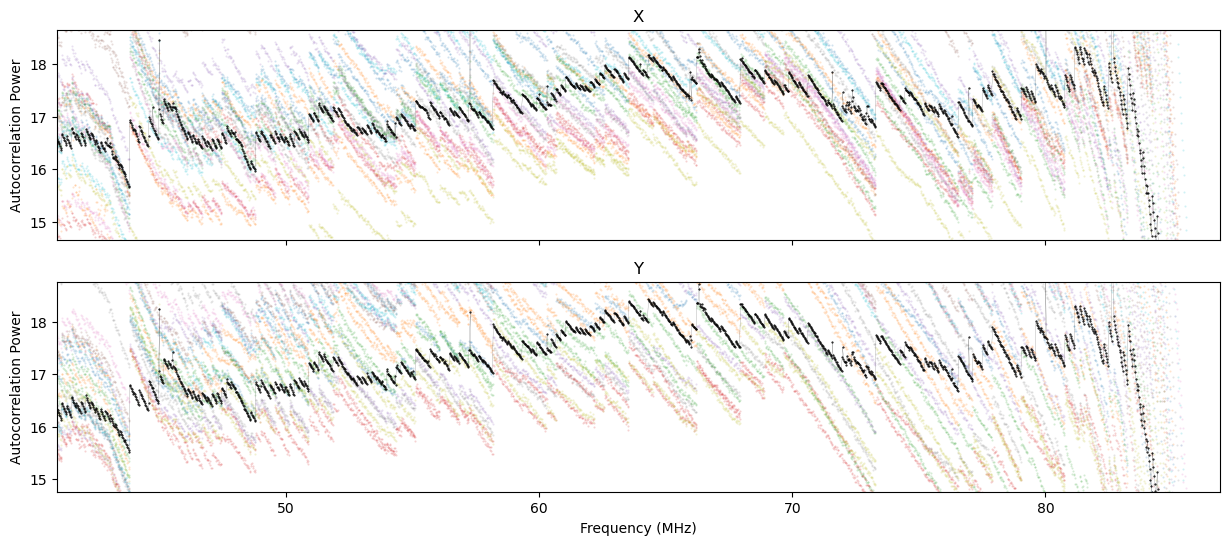

In [3]:
for file_ind, filename in enumerate(use_file_paths):
    uvnew = pyuvdata.UVData()
    uvnew.read_ms(filename)
    uvnew.select(ant_str="autos")
    if file_ind == 0:
        uv = uvnew
    else:
        uv.fast_concat(uvnew, "freq", inplace=True, run_check=False)
uv.data_array[np.where(uv.data_array == 0)] = np.nan

fig, ax = plt.subplots(2, 1, sharex=True, figsize=(15,6))
ax[1].set_xlabel("Frequency (MHz)")
pol_names = ["X", "Y"]
for pol in range(2):
    ax[pol].set_ylabel("Autocorrelation Power")
    ax[pol].set_title(pol_names[pol])
    ax[pol].set_xlim(np.min(uv.freq_array)/1e6, np.max(uv.freq_array)/1e6)
    ax[pol].set_ylim(np.nanmean(uv.data_array[:, :, pol]) - 2, np.nanmean(uv.data_array[:,:,pol]) + 2)
    for ant in range(20):
        ax[pol].plot(uv.freq_array/1e6, uv.data_array[ant, :, pol], ".", markersize=1, alpha=0.2)
    ax[pol].plot(uv.freq_array/1e6, np.nanmean(uv.data_array, axis=0)[:, pol], ".-", linewidth=0.1, markersize=1, color="black")
plt.show()
plt.close()

In [4]:
calfiles = [f"/lustre/rbyrne/2025-01-17/20250117_140158-140348_{freq}MHz.calfits" for freq in use_freq_bands]
for file_ind, filename in enumerate(calfiles):
    uvcal_new = pyuvdata.UVCal()
    uvcal_new.read(filename)
    if file_ind == 0:
        uvcal = uvcal_new
    else:
        uvcal.fast_concat(uvcal_new, "freq", inplace=True)

In [5]:
np.shape(uvcal.gain_array)

(352, 1920, 1, 2)

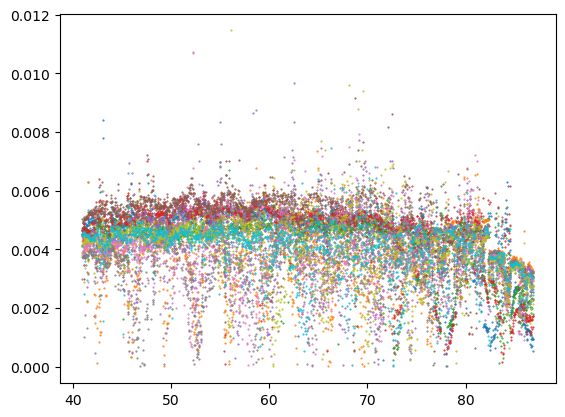

In [6]:
for ant_ind in range(10):
    plt.plot(uvcal.freq_array/1e6, np.abs(uvcal.gain_array[ant_ind, :, 0, 0]), ".", markersize=1)
plt.show()

LWA266


key CASA_Version in extra_keywords is longer than 8 characters. It will be truncated to 8 if written to a calfits file format.
Casting complex values to real discards the imaginary part
Casting complex values to real discards the imaginary part


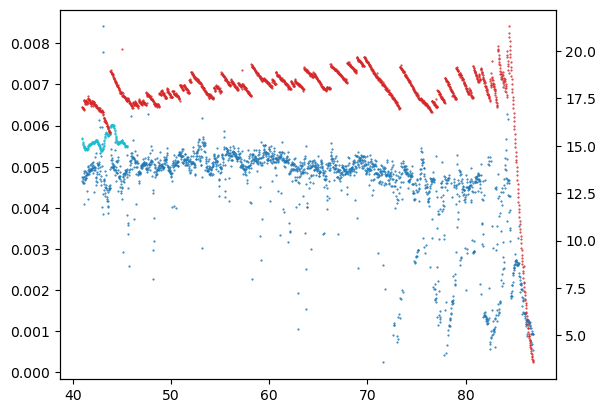

LWA259


key CASA_Version in extra_keywords is longer than 8 characters. It will be truncated to 8 if written to a calfits file format.
Casting complex values to real discards the imaginary part
Casting complex values to real discards the imaginary part


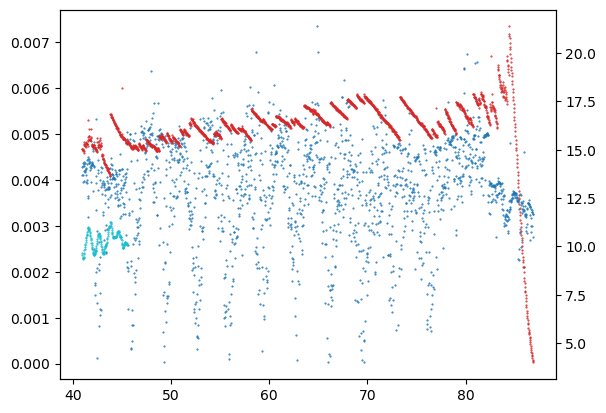

LWA268


key CASA_Version in extra_keywords is longer than 8 characters. It will be truncated to 8 if written to a calfits file format.
Casting complex values to real discards the imaginary part
Casting complex values to real discards the imaginary part


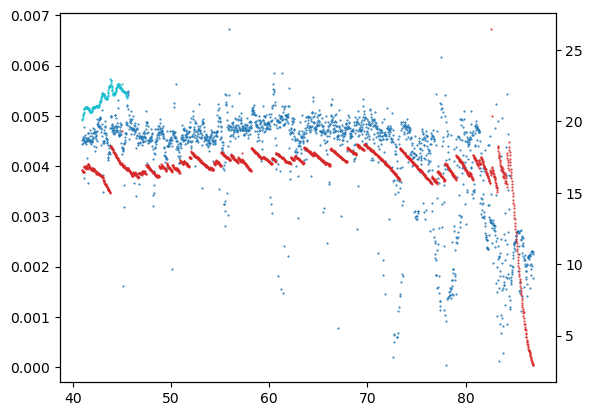

In [26]:
for antname in uv.antenna_names[0:3]:
    print(antname)
    uv_single_ant = uv.select(antenna_names=[antname], inplace=False)
    uvcal_single_ant = uvcal.select(antenna_names=[antname], inplace=False)
    nikita_cal_single_ant = uvcal_nikita.select(antenna_names=[antname], inplace=False)

    fig, ax1 = plt.subplots()
    ax1.plot(uvcal_single_ant.freq_array/1e6, np.abs(uvcal_single_ant.gain_array[0, :, 0, 0]), ".", markersize=1, color="tab:blue")
    ax1.plot(nikita_cal_single_ant.freq_array/1e6, np.abs(nikita_cal_single_ant.gain_array[0, :, 0, 0])/2, ".", markersize=1, color="tab:cyan")


    ax2=ax1.twinx()
    ax2.plot(uv_single_ant.freq_array/1e6, uv_single_ant.data_array[0, :, 0], ".", markersize=1, color="tab:red")
    plt.show()

In [21]:
nikitia_calfiles = [f"/lustre/pipeline/calibration/bandpass/{freq}MHz/2025-01-27/19/bandpass_concat.{freq}MHz_19.bandpass" for freq in use_freq_bands]
for file_ind, filename in enumerate(nikitia_calfiles):
    uvcal_new = pyuvdata.UVCal()
    uvcal_new.read(filename, file_type="ms")
    if file_ind == 0:
        uvcal_nikita = uvcal_new
    else:
        uvcal_nikita.fast_concat(uvcal_new, "freq", inplace=True)

Setting telescope_location to value in known_telescopes for OVRO-LWA.
Unknown polarization basis for solutions, jones_array values may be spurious.
Unknown x_orientation basis for solutions, assuming "east".
key CASA_Version in extra_keywords is longer than 8 characters. It will be truncated to 8 if written to a calfits file format.


FileNotFoundError: /lustre/pipeline/calibration/bandpass/46MHz/2025-01-27/19/bandpass_concat.46MHz_19.bandpass not found or not recognized as an MS table.

In [23]:
uvcal_new = pyuvdata.UVCal()
uvcal_new.read("/lustre/pipeline/calibration/bandpass/41MHz/2025-01-27/19/bandpass_concat.41MHz_19.bandpass")

Setting telescope_location to value in known_telescopes for OVRO-LWA.
Unknown polarization basis for solutions, jones_array values may be spurious.
Unknown x_orientation basis for solutions, assuming "east".
key CASA_Version in extra_keywords is longer than 8 characters. It will be truncated to 8 if written to a calfits file format.
